## **Gráfico Coroplético: Distribución del Porcentaje de Pobreza por Ingresos en las Regiones de Chile (2022)**


### **IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### **CARGAR EL ARCHIVO SHAPEFILE**

In [2]:
shapefile_path = './geodata/REGIONES_2020.shp'
gdf = gpd.read_file(shapefile_path)

### **CANTIDAD DE FILAS DE GEODATAFRAME**

In [3]:
print(gdf.count())

CUT_REG       16
REGION        16
SUPERFICIE    16
geometry      16
dtype: int64


### **VERIFICAR LAS PRIMERAS FILAS DEL GEODATAFRAME**

In [4]:
print(gdf.head(16))

   CUT_REG                                     REGION  SUPERFICIE  \
0       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1       07                                      Maule    30321.08   
2       02                                Antofagasta   126066.54   
3       09                               La Araucanía    31811.89   
4       12       Magallanes y de la Antártica Chilena   130482.00   
5       06      Libertador General Bernardo O'Higgins    16347.03   
6       03                                    Atacama    75650.08   
7       05                                 Valparaíso    16240.50   
8       10                                  Los Lagos    48372.46   
9       08                                     Biobío    23996.18   
10      01                                   Tarapacá    42288.81   
11      13                  Metropolitana de Santiago    15401.94   
12      14                                   Los Ríos    18324.18   
13      15                        

### **VERIFICAR LOS NOMBRES DE LAS COLUMNAS DEL GEODATAFRAME**

In [5]:
print(gdf.columns)

Index(['CUT_REG', 'REGION', 'SUPERFICIE', 'geometry'], dtype='object')


### **CARGAR DATAFRAME FUSIONADO**

In [6]:
df_merge = pd.read_csv('./data/df_merge_preliminar.csv')

### **DICCIONARIO PARA REEMPLAZAR LOS NOMBRES DE REGIONES**

In [7]:
reemplazos_regiones = {
    'Tarapacá': 'Tarapacá',
    'Antofagasta': 'Antofagasta',
    'Atacama': 'Atacama',
    'Coquimbo': 'Coquimbo',
    'Valparaíso': 'Valparaíso',
    'O\'Higgins': 'Libertador General Bernardo O\'Higgins',
    'Maule': 'Maule',
    'Biobío': 'Biobío',
    'La Araucanía': 'La Araucanía',
    'Los Lagos': 'Los Lagos',
    'Aysén': 'Aysén del General Carlos Ibáñez del Campo',
    'Magallanes': 'Magallanes y de la Antártica Chilena',
    'Metropolitana': 'Metropolitana de Santiago',
    'Los Ríos': 'Los Ríos',
    'Arica y Parinacota': 'Arica y Parinacota',
    'Ñuble': 'Ñuble'
}

### **REEMPLAZAR LOS NOMBRES DE LAS REGIONES EN EL DATAFRAME**

In [8]:
df_merge['region'] = df_merge['region'].replace(reemplazos_regiones)

### **FUSIONAR EL SHAPEFILE CON EL DATAFRAME**

In [9]:
# Se fusiona por la columna 'REGION' en el shapefile y 'region' en el dataframe
gdf_merge = gdf.merge(df_merge, left_on='REGION', right_on='region', how='left')

In [10]:
# Verificar que los datos se hayan fusionado correctamente
print(gdf_merge.head(16))

   CUT_REG                                     REGION  SUPERFICIE  \
0       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
2       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
3       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
4       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
5       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
6       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
7       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
8       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
9       11  Aysén del General Carlos Ibáñez del Campo   106796.55   
10      07                                      Maule    30321.08   
11      07                                      Maule    30321.08   
12      07                                      Maule    30321.08   
13      07                        

In [13]:
# Verificar el CRS actual y reproyecta a UTM zone 19S (Chile)
gdf_merge_projected = gdf_merge.to_crs(epsg=32719)  # UTM zone 19S

### **PERSONALIZACIÓN DEL GRÁFICO**

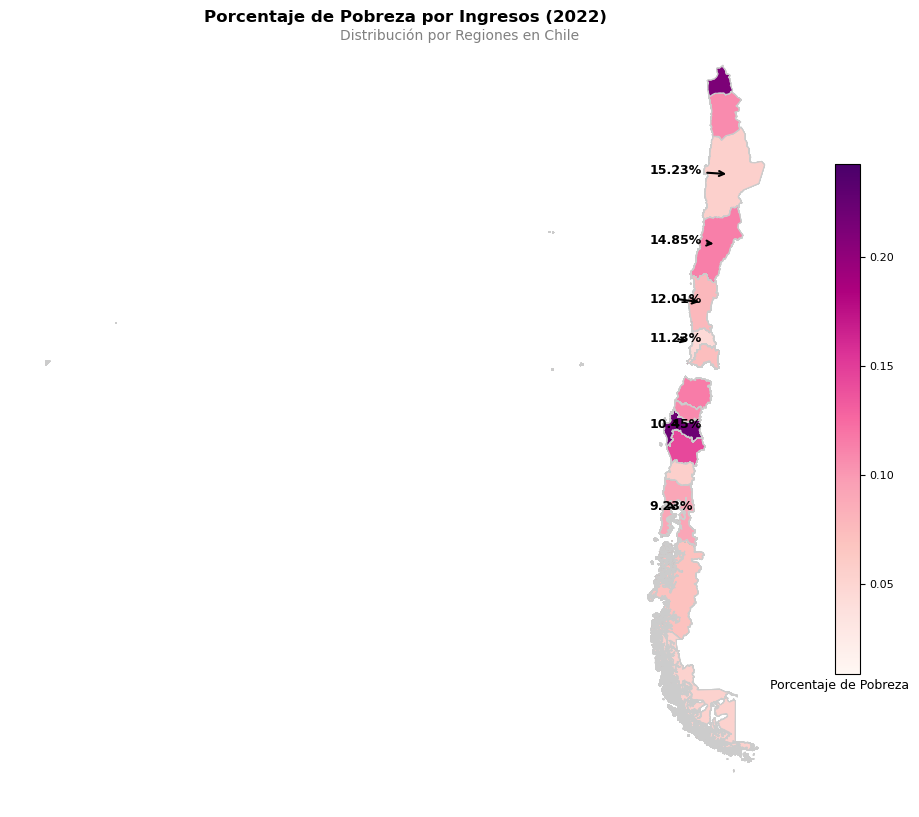

In [23]:
# Crear el gráfico geográfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plotear las regiones y colorear según el porcentaje de pobreza por ingresos
plot = gdf_merge_projected.plot(column='porcentaje_pobreza_por_ingresos_2022', 
                                cmap='RdPu', 
                                linewidth=0.8, 
                                ax=ax, 
                                edgecolor='0.8', 
                                legend=False)

# Crear manualmente la barra de color y ajustarla
cbar = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=gdf_merge['porcentaje_pobreza_por_ingresos_2022'].min(), vmax=gdf_merge['porcentaje_pobreza_por_ingresos_2022'].max()))
cbar = fig.colorbar(cbar, ax=ax, fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=8)

# Etiqueta para la barra de color
fig.text(0.88, 0.24, 'Porcentaje de Pobreza', ha='center', va='top', fontsize=9, color='black')

# Eliminar los ejes
ax.set_xticks([])
ax.set_yticks([])

# Eliminar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Etiquetas de porcentaje colocadas manualmente con líneas horizontales hacia la izquierda
manual_labels = {
    'Antofagasta': {'pos': (-80, 7400000), 'text': '15.23%'},
    'Atacama': {'pos': (-80, 7200000), 'text': '14.85%'},
    'Coquimbo': {'pos': (-80, 7050000), 'text': '12.01%'},
    'Valparaíso': {'pos': (-80, 6800000), 'text': '11.23%'},
    'Biobío': {'pos': (-80, 6400000), 'text': '10.45%'},
    'Los Lagos': {'pos': (-80, 6100000), 'text': '9.23%'}
}

# Dibujar las etiquetas manualmente con líneas horizontales hacia la izquierda
for region, data in manual_labels.items():
    # Centroides de las regiones para posicionar las flechas
    region_centroid = gdf_merge_projected.loc[gdf_merge_projected['REGION'] == region].geometry.centroid
    centroid_x = region_centroid.x.values[0]
    centroid_y = region_centroid.y.values[0]
    
    # Etiquetas con flechas horizontales
    ax.annotate(text=data['text'], 
                xy=(centroid_x, centroid_y),  # Posición de la flecha
                xytext=(data['pos'][0], centroid_y),  # Mantener el y constante, mover x a la izquierda
                arrowprops=dict(arrowstyle="->", lw=1.5, color='black'), 
                fontsize=9, color='black', weight='bold')

# Título
ax.set_title('Porcentaje de Pobreza por Ingresos (2022)', 
             fontsize=12, weight='bold')

# Subtítulo centrado en la parte superior de la figura
fig.suptitle('Distribución por Regiones en Chile', fontsize=10, weight='light', color='gray', x=0.5, y=0.89, ha='center')

# Eliminar los márgenes alrededor del mapa
plt.subplots_adjust(left=0.05, right=0.9, top=0.95, bottom=0.05)
plt.show()
